# Final Project: Netflix Movies/TV Shows Analysis

### Import libraries 

In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt 

### Read files into notebook

#### I have chosen these two csv files because they contain different information on the same Netflix movies/tv shows that I thought would be interesting to analyze. The netflix_titles.csv file contains information about the title, director, duration, etc. while the Netflix Shows.csv file contains information regarding Netflix user scores which will be the foundation for this analysis. 

In [2]:
ntitles = pd.read_csv('netflix_titles.csv')
ratings = pd.read_csv('Netflix Shows.csv')

## netflix_titles.csv set up

#### I chose to first understand the data types, column names, and column counts to discern which columns will be useful to me for my analysis. By doing so, I am able to narrow down my focus to only the columns and data that I require to answer my questions.

### Find useful information on datatypes and column names of netflix_titles.csv

In [3]:
ntitles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Select only the columns that are useful to my analysis using a filter and applying it

In [4]:
ntitles = ntitles[['type','title','director','release_year','rating','duration']]

### Created a list of all the columns of interest, then made a for loop to find any columns with NaN values that need to be dropped

In [5]:
clist = ['type','title','director','release_year','rating','duration']
for n in clist:
    print(ntitles[n].isnull().values.any())

False
False
True
False
True
False


In [6]:
ntitles = ntitles.dropna(subset=['director','rating'])
for n in clist:
    print(ntitles[n].isnull().values.any())

False
False
False
False
False
False


## Netflix Shows.csv set up

### I will mainly be looking at the 'user rating score' column for my analysis.

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [8]:
ratings = ratings[['title','rating','release year','user rating score']]

In [9]:
clist = ['title','rating','release year','user rating score']
for n in clist:
    print(ratings[n].isnull().values.any())

False
False
False
True


In [10]:
ratings = ratings.dropna(subset=['user rating score'])
for n in clist:
    print(ratings[n].isnull().values.any())

False
False
False
False


### Cleaning movie title names by removing any unnecessary characters

#### This is important because movie names and tv show names could be labeled differently across the two files, so by creating a primary key in which they have exact matches via title will allow me to join the two dataframes into one dataframe.

In [11]:
def get_prim_key(title):
    tt = title
    exclude = set(u"!\"#$%'()*+,./:;<=>?@[\\/]^_`{|}~'")
    tt = u''.join(ch for ch in tt if ch not in exclude)
    tt = tt.replace(u'-',u' ')
    tt = tt.replace(u'&',u'and')
    tt = tt.replace(u' in 3d',u'')
    tt = tt.replace(u' 3d',u'')
    tt = tt.replace(u' in 3D',u'')
    tt = tt.replace(u' 3D',u'')
    tt = tt.strip()
    tt = re.sub(u' +',u' ',tt).lower()
    return tt

### Applying the function to both dataframes and creating 'primkey' column as a primary key for join

In [12]:
ntitles['primkey'] = ntitles.apply(lambda row: get_prim_key(row['title']),axis=1)
ratings['primkey'] = ratings.apply(lambda row: get_prim_key(row['title']),axis=1)

### Created 'merged' dataframe to create a single datafram between both ratings and ntitles dataframes. The reason why I used inner join is so that I do not have any Nan in my output

In [13]:
merged = pd.merge(ratings,ntitles, how='inner',on='primkey')

In [14]:
type(merged)

pandas.core.frame.DataFrame

### We are left with 70 total rows after the join.

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            70 non-null     object 
 1   rating_x           70 non-null     object 
 2   release year       70 non-null     int64  
 3   user rating score  70 non-null     float64
 4   primkey            70 non-null     object 
 5   type               70 non-null     object 
 6   title_y            70 non-null     object 
 7   director           70 non-null     object 
 8   release_year       70 non-null     int64  
 9   rating_y           70 non-null     object 
 10  duration           70 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 6.6+ KB


In [16]:
merged.head()

,title_x,rating_x,release year,user rating score,primkey,type,title_y,director,release_year,rating_y,duration
0,Supernatural,TV-14,2016,95.0,supernatural,TV Show,Supernatural,Phil Sgriccia,2019,TV-14,15 Seasons
1,Supernatural,TV-14,2016,95.0,supernatural,TV Show,Supernatural,Phil Sgriccia,2019,TV-14,15 Seasons
2,Supernatural,TV-14,2016,95.0,supernatural,TV Show,Supernatural,Phil Sgriccia,2019,TV-14,15 Seasons
3,Death Note,TV-14,2006,77.0,death note,Movie,Death Note,Adam Wingard,2017,TV-MA,100 min
4,Naruto,TV-PG,2008,88.0,naruto,TV Show,Naruto,Hayato Date,2006,TV-14,9 Seasons


### Noticed there were some duplicates so I dropped them

In [17]:
merged.drop_duplicates()

,title_x,rating_x,release year,user rating score,primkey,type,title_y,director,release_year,rating_y,duration
0,Supernatural,TV-14,2016,95.0,supernatural,TV Show,Supernatural,Phil Sgriccia,2019,TV-14,15 Seasons
3,Death Note,TV-14,2006,77.0,death note,Movie,Death Note,Adam Wingard,2017,TV-MA,100 min
4,Naruto,TV-PG,2008,88.0,naruto,TV Show,Naruto,Hayato Date,2006,TV-14,9 Seasons
5,Arrow,TV-14,2015,96.0,arrow,TV Show,Arrow,James Bamford,2019,TV-14,8 Seasons
7,The Flash,TV-PG,2016,98.0,the flash,TV Show,The Flash,Glen Winter,2019,TV-14,6 Seasons
9,The Do-Over,TV-MA,2016,84.0,the do over,Movie,The Do-Over,Steven Brill,2016,TV-MA,109 min
10,Sand Castle,TV-MA,2017,89.0,sand castle,Movie,Sand Castle,Fernando Coimbra,2017,TV-MA,113 min
12,Sandy Wexler,TV-14,2017,92.0,sandy wexler,Movie,Sandy Wexler,Steven Brill,2017,TV-14,131 min
16,Kevin Hart: What Now?,R,2016,97.0,kevin hart what now,Movie,Kevin Hart: What Now?,Leslie Small,2016,R,96 min
17,The Great British Baking Show,TV-PG,2016,94.0,the great british baking show,TV Show,The Great British Baking Show,Andy Devonshire,2020,TV-14,8 Seasons


### There are multiple columns with the same type of information, so I will change the names of the columns to make it more uniform, and filter out the duplicate columns

In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            70 non-null     object 
 1   rating_x           70 non-null     object 
 2   release year       70 non-null     int64  
 3   user rating score  70 non-null     float64
 4   primkey            70 non-null     object 
 5   type               70 non-null     object 
 6   title_y            70 non-null     object 
 7   director           70 non-null     object 
 8   release_year       70 non-null     int64  
 9   rating_y           70 non-null     object 
 10  duration           70 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 6.6+ KB


In [19]:
merged = merged.rename(columns={'title_x':'title','rating_x':'rating',})
merged = merged[['title','rating','user rating score','type','director','release_year','duration']]

In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              70 non-null     object 
 1   rating             70 non-null     object 
 2   user rating score  70 non-null     float64
 3   type               70 non-null     object 
 4   director           70 non-null     object 
 5   release_year       70 non-null     int64  
 6   duration           70 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ KB


# Now we are ready to start our analysis of the data

## Comparing movie/tv show rating and user rating score

### In this section, I have chosen to compare the movie and tv show ratings and the user rating scores to see if there was any difference in ratings and popularity of content on Netflix. I used a group by function on the rating column to eliminate duplicates, then I averaged the user rating score for each rating. Next, I used a bar graph to visualize it so that it is easier to compare the average ratings with one another.

In [21]:
merged['rating'].unique()

array(['TV-14', 'TV-PG', 'TV-MA', 'R', 'PG-13', 'PG', 'G', 'TV-G'],
      dtype=object)

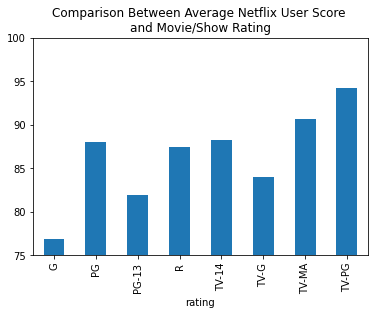

In [22]:
plt.title('Comparison Between Average Netflix User Score \nand Movie/Show Rating')
ax = plt.gca()
ax.set_xlabel('rating')
ax.set_ylim(75,100)
merged.groupby('rating').mean()['user rating score'].plot(kind='bar')
plt.show()

### From this graph we can tell that Movies and TV Shows with TV-MA or TV-PG rating have the highest average score for show ratings. The challenge here, though, is that the 'TV-' prefix is also applied to films as well, so it distorts the data slightly.

## Finding the Correlation Between User Rating Score and Duration

#### For this analysis, I am determining whether or not there is a correlation between the duration of a movie/tv show and its user rating score. If the correlation number is close to 1.0, then that means that duration and user rating scores are positively correlated. The opposite is true for a number close to -1.0. I separated the merged dataframes into separate dataframes with different filters, one for movies and one for tv shows. The reason for this being that movie durations were measured in minutes whereas tv show durations were measured in seasons. By separately calculating the correlation coefficients, I was able to more accurately determines both categories' relationships.

### Prepping the data where I remove 'min' from Movies and 'Seasons' from TV Shows so that I can convert the 'duration' column into an integer

In [23]:
def cleanData(length):
    duration = length
    exclude = set(('min','Seasons'))
    duration = u''.join(ch for ch in duration if ch not in exclude)
    duration = duration.replace('min','')
    duration = duration.replace('Seasons','')
    return duration

In [24]:
merged['duration'] = merged.apply(lambda row: cleanData(row['duration']),axis=1)

### Converting duration into number format

In [25]:
merged['duration'] = pd.to_numeric(merged['duration'], errors='coerce')
merged = merged.dropna(subset=['duration'])

In [26]:
mergedmovies = merged[merged['type'].str.contains('Movie')]
mergedtv = merged[merged['type'].str.contains('TV Show')]

In [27]:
column1 = mergedmovies['user rating score']
column2 = mergedmovies['duration']
column3 = mergedtv['user rating score']
column4 = mergedtv['duration']
print('Movies: ',column1.corr(column2), 'TV Shows: ',column3.corr(column4),sep='\n')

Movies: 
0.4287550657603939
TV Shows: 
0.16913536245662328


### Movies has a moderate correlation with duration--the longer the movie, the more likely it will receive a high rating. On the other hand, TV shows and seasons length shows very little correlation with user ratings.

## Who are the top directors of Netflix movies and tv shows, and how much of their content has been on Netflix in proportion to other top directors?

#### For this section I utilized a pie chart to visualize which top directors had the highest proportion of productions on Netflix. By using a pie chart, I am able to easily discern which directors with the highest user rating score was able to direct the most content to be streamed on Netflix.

### Finding all unique directors

In [28]:
merged['director'].count()

67

### Creating a groupby using two aggregations, mean and count, in order to see which directors have the highest average user rating score and to also look at their count as well.

In [29]:
grpby = merged.groupby('director').agg({'user rating score':['mean','count']})
grpby = grpby.sort_values(by=('user rating score', 'mean'),ascending=True).tail(n=5)
grpby

user rating score      
                           mean count
director                             
Henry Selick               95.0     4
Phil Sgriccia              95.0     3
James Bamford              96.0     2
Leslie Small               97.0     1
Glen Winter                98.0     2

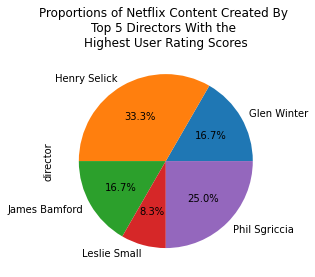

In [30]:
topdirectors = ['Henry Selick','Phil Sgriccia','James Bamford','Leslie Small','Glen Winter']
top5 = merged[merged['director'].isin(topdirectors)]
grpby = top5.groupby('director')['director'].count()
grpby.plot(kind='pie',autopct='%1.1f%%')
plt.title('Proportions of Netflix Content Created By \nTop 5 Directors With the \nHighest User Rating Scores')
plt.show()

### From this chart we can tell that Henry Selick has the highest proportion of productions on Netflix with a dominating 33.3% or 1/3 of the top 5 directors on Netflix